# PFE-Master_IAAD_Code
## *Ce code contient les étapes nécessaires pour le dévelopment d'un modèle intelligent*
---
[![GitHub](https://img.shields.io/badge/GitHub-%23121011.svg?&style=for-the-badge&logo=GitHub&logoColor=white)](https://github.com/YassineOurara/Explosion-induced-vibrations-AI-Prediction)


---


##Importation des librairie

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel,RFECV,SelectKBest,chi2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Jeu de données

### Importation des données

In [ ]:
# Load the dataset
data=pd.read_csv('/content/drive/MyDrive/Data_PFE/data_full.csv')

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Data_PFE/data_aug_full.csv')

In [ ]:
# Clacule de la distance scalaire afin de l'y utiliser dans le code R
data['SD'] = data['Distance'] / np.sqrt(data['CUM'])

In [ ]:
data

,NT,NR,PM,BF,CUM,ND,Distance,PPV,SD
0,179.956058,11.979041,3.112541,2.333005,24.871661,180.031359,700.058196,6.090419,140.372409
1,157.971697,6.988991,4.054349,2.984747,31.822894,157.971486,700.032358,2.304467,124.093285
2,124.950988,10.959423,8.584502,6.450287,75.037505,125.008295,600.036473,4.265418,69.268926
3,95.005485,9.962952,5.087856,6.528217,49.942909,94.974616,699.978376,2.388220,99.048456
4,130.994307,8.940426,3.960075,2.929938,41.475847,131.012917,700.091855,3.063006,108.706970
...,...,...,...,...,...,...,...,...,...
2407,219.000000,7.000000,2.970000,2.400000,16.000000,219.000000,700.000000,6.070000,175.000000
2408,126.000000,8.000000,4.400000,3.400000,33.250000,126.000000,700.000000,0.985000,121.395396
2409,209.000000,6.000000,4.250000,3.300000,32.000000,209.000000,700.000000,2.309000,123.743687
2410,230.000000,7.000000,4.000000,3.000000,32.000000,230.000000,700.000000,6.860000,123.743687


In [ ]:
# Téléchargement d'un fichier csv contenant les données avec 'SD' calculée
data.to_csv('data_aug_SD.csv', index=False)

### Augmentation des données

####Interpolation and Jittering

In [ ]:
# import numpy as np
# import pandas as pd

# def interpolate_data(data, num_samples=300):
#     interpolated_data = []
#     for _ in range(num_samples):
#         idx1, idx2 = np.random.choice(data.shape[0], 2, replace=False)
#         alpha = np.random.rand()
#         interpolated_sample = alpha * data.iloc[idx1] + (1 - alpha) * data.iloc[idx2]
#         interpolated_data.append(interpolated_sample)
#     return pd.DataFrame(interpolated_data)

# def jitter_data(data, num_copies=5, noise_level=0.01):
#     jittered_data = []
#     for _ in range(num_copies):
#         noise = np.random.normal(0, noise_level, data.shape)
#         jittered_data.append(data + noise)
#     return pd.concat(jittered_data, ignore_index=True)

# # Exemple d'utilisation
# # Supposons que 'data' soit votre DataFrame existant avec 150 lignes et 9 colonnes

# # 1. Générer 300 nouvelles lignes par interpolation
# interpolated_data = interpolate_data(data, num_samples=300)

# # 2. Combiner les données d'origine et les données interpolées
# combined_data = pd.concat([data, interpolated_data], ignore_index=True)

# # 3. Appliquer du jittering 5 fois sur l'ensemble des données combinées
# augmented_data = jitter_data(combined_data, num_copies=5, noise_level=0.05)

# # Afficher les nouvelles données augmentées
# print(augmented_data.head())

# # Afficher la taille totale des données augmentées
# print(f"Nombre tot8al de lignes après augmentation : {augmented_data.shape[0]}")


In [ ]:
# augmented_data

In [ ]:
# augmented_data.to_csv('augmented_data.csv', index=False)

In [ ]:
# data.to_csv('data_aug.csv', index=False)

In [ ]:
# data

,NT,NR,PM (m),BF,CUM(Kg),ND,Distance du tir(m),PPV(mm/s)
0,180.000000,12.000000,3.190000,2.300000,24.940000,180.000000,700.000000,6.069000
1,158.000000,7.000000,4.000000,3.000000,31.750000,158.000000,700.000000,2.294000
2,125.000000,11.000000,8.510000,6.510000,75.000000,125.000000,600.000000,4.201000
3,95.000000,10.000000,5.090000,6.510000,50.000000,95.000000,700.000000,2.372000
4,131.000000,9.000000,3.930000,2.900000,41.500000,131.000000,700.000000,3.082000
...,...,...,...,...,...,...,...,...
680,805.090812,12.597911,4.328567,6.932430,90.114291,74.002629,609.599768,15.457402
681,390.153363,9.155534,4.939623,3.827795,64.286987,211.867204,592.252853,2.049431
682,252.420330,13.167989,6.548063,2.654176,45.722951,278.124271,723.281069,6.476430
683,61.513218,12.946568,7.817724,5.468572,57.302137,203.442802,778.683898,8.763638


### Pré-traitemant des données


##### Détection des données aberrantes en utilisant le z-score

In [ ]:
# Supression de la colonnes 'SD'
data = data.drop('SD', axis=1)
data

,NT,NR,PM,BF,CUM,ND,Distance,PPV
0,179.956058,11.979041,3.112541,2.333005,24.871661,180.031359,700.058196,6.090419
1,157.971697,6.988991,4.054349,2.984747,31.822894,157.971486,700.032358,2.304467
2,124.950988,10.959423,8.584502,6.450287,75.037505,125.008295,600.036473,4.265418
3,95.005485,9.962952,5.087856,6.528217,49.942909,94.974616,699.978376,2.388220
4,130.994307,8.940426,3.960075,2.929938,41.475847,131.012917,700.091855,3.063006
...,...,...,...,...,...,...,...,...
2407,219.000000,7.000000,2.970000,2.400000,16.000000,219.000000,700.000000,6.070000
2408,126.000000,8.000000,4.400000,3.400000,33.250000,126.000000,700.000000,0.985000
2409,209.000000,6.000000,4.250000,3.300000,32.000000,209.000000,700.000000,2.309000
2410,230.000000,7.000000,4.000000,3.000000,32.000000,230.000000,700.000000,6.860000


In [ ]:
#Fonction pour détecter les données aberrantes
def detect_ouliers(data):
  outliers=[]
  threshold=3
  mean=np.mean(data)
  std=np.std(data)

  for xi in data:
    z_score=(xi-mean)/std
    #print(z_score)
    if np.abs(z_score)>threshold:
      outliers.append(xi)
  return outliers

In [ ]:
# Remplacement des données aberrantes par 'NaN'
for  col in data.columns:
  # print(col," :")
  # print(detect_ouliers(data[col]))
  data[col].loc[data[col].isin(detect_ouliers(data[col]))]=np.nan

#### Création de deux Dataframe 'X' pour les colonnes d'entrée et 'y' pour la colonne de sortie


In [ ]:
X=data.drop(columns=["PPV"])
y=pd.DataFrame(data=data['PPV'],columns=['PPV'],index=data.index)

####Remplissement des cases 'NaN'

In [ ]:
from sklearn.impute import KNNImputer, SimpleImputer
# Utilisation de la stratégie 'mean' pour ramplire les 'NaN' dans 'y'
simple_Imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
y=simple_Imputer.fit_transform(y)
y=pd.DataFrame(data=y, columns=['PPV'])
# Utilisation du KnnImputer avec 3 plus proches voisins
KNN_imputer=KNNImputer(n_neighbors=3)
KNNStationData=KNN_imputer.fit_transform(X)
X=pd.DataFrame(data=KNNStationData, columns=X.columns)

##Development du modèle intelligent

####Architecture de Modéle du Réseau de neuronnes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error (Train): 0.4799788296222687
Mean Squared Error (Test): 0.521065354347229
61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Absolute Error (Train): 0.26784101952213124
Mean Absolute Error (Test): 0.3135154510609571
R-squared (Train): 0.9456799071171297
R-squared (Test): 0.9334420763087984


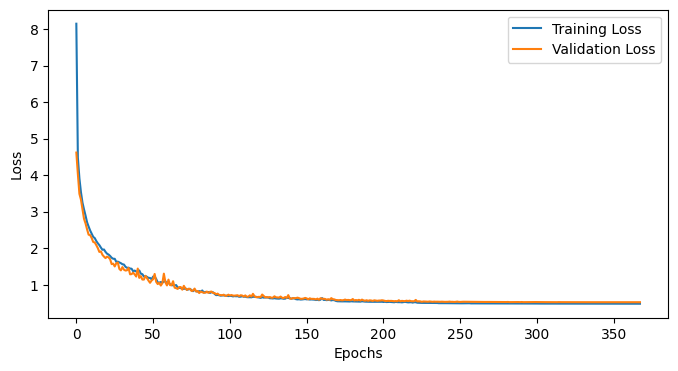

In [ ]:
# Imporation des librairies
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Division des donées en Train et Test
X = X.astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#  Definition de l'architecture du réseau
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.01, l2=0.01), input_shape=(7,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')
])

# Optimisation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mean_squared_error')

# Early stopping and learning rate scheduler
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10, min_lr=1e-6)

history = model2.fit(X_train_scaled, y_train, epochs=500, validation_data=(X_test_scaled, y_test),
                     callbacks=[early_stopping, reduce_lr], verbose=0)

# Evaluation du modèle
mse_train = model2.evaluate(X_train_scaled, y_train, verbose=0)
mse_test = model2.evaluate(X_test_scaled, y_test, verbose=0)
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Prédire
y_pred_train = model2.predict(X_train_scaled)
y_pred_test = model2.predict(X_test_scaled)

# Calcule par d'autres metriques d'évaluation
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Absolute Error (Train):", mae_train)
print("Mean Absolute Error (Test):", mae_test)
print("R-squared (Train):", r2_train)
print("R-squared (Test):", r2_test)


# Plotting the learning curves
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


####Affichage du nuage de points avec (y=x) dans Train-set avec les données Réelles

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error: 1.9816937446594238
Mean Absolute Error: 0.6088786726909701
R-squared: 0.7761293091051272


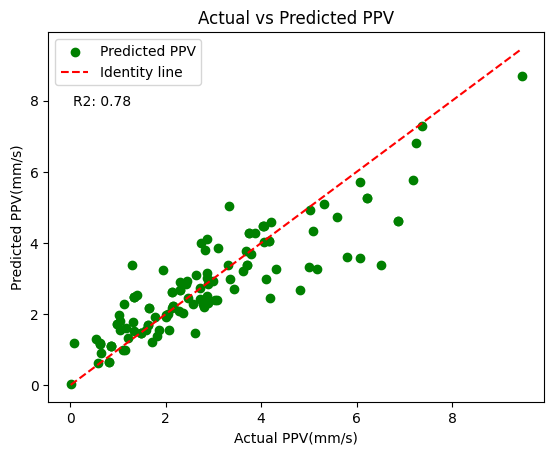

In [ ]:
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# y_pred_train = model2.predict(X_train_scaled)
# mse_train = model2.evaluate(X_train_scaled, y_train, verbose=0)
# mae_train = mean_absolute_error(y_train, y_pred_train)

# #  C'est une mesure couramment utilisée pour évaluer la performance d'un modèle de régression.
# #  Plus le MSE est bas, meilleure est la performance du modèle,
# #  car cela signifie que les prédictions du modèle sont proches des valeurs réelles en moyenne.
# r2_train = r2_score(y_train, y_pred_train)
# print("Mean Squared Error:", mse_train)
# print("Mean Absolute Error:", mae_train)
# print("R-squared:", r2_train)


# # Scatter plot of actual vs predicted PPV values
# plt.scatter(y_train, y_pred_train, color='green', label='Predicted PPV')

# # Plotting the identity line
# plt.plot([min(y_train.values), max(y_train.values)], [min(y_train.values), max(y_train.values)], color='red', linestyle='--', label='Identity line')

# # Labels and title
# plt.xlabel("Actual PPV(mm/s)")
# plt.ylabel("Predicted PPV(mm/s)")
# plt.title("Actual vs Predicted PPV")

# # MSE and R2 annotation
# plt.text(0.05, 0.8, f"R2: {r2_train:.2f}", transform=plt.gca().transAxes)

# # Show legend
# plt.legend()

# # Display the plot
# plt.show()



####Affichage du nuage de points avec (y=x) dans Test-set avec les données Réelles

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Mean Squared Error: 4.095390796661377
Mean Absolute Error: 1.3233289555301588
R-squared: 0.42494161815173626


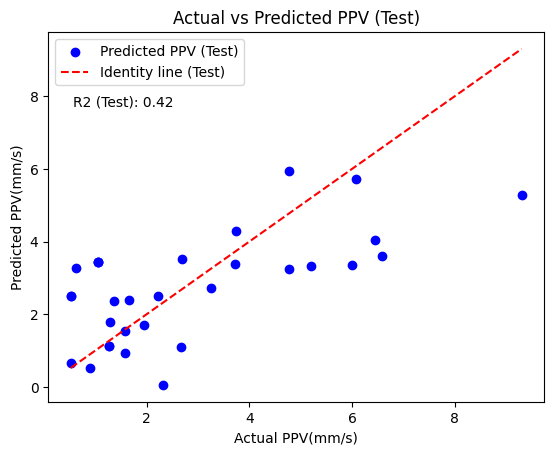

In [ ]:
# y_pred_test = model2.predict(X_test_scaled)
# mae_test = mean_absolute_error(y_test, y_pred_test)
# mse_test = model2.evaluate(X_test_scaled, y_test, verbose=0)

# from sklearn.metrics import r2_score

# # Calculate R2 score for the test set
# r2_test = r2_score(y_test, y_pred_test)

# print("Mean Squared Error:", mse_test)
# print("Mean Absolute Error:", mae_test)
# print("R-squared:", r2_test)

# # Scatter plot of actual vs predicted PPV values for the test set
# plt.scatter(y_test, y_pred_test, color='blue', label='Predicted PPV (Test)')

# # Plotting the identity line for the test set
# plt.plot([min(y_test.values), max(y_test.values)], [min(y_test.values), max(y_test.values)], color='red', linestyle='--', label='Identity line (Test)')

# # Labels and title
# plt.xlabel("Actual PPV(mm/s)")
# plt.ylabel("Predicted PPV(mm/s)")
# plt.title("Actual vs Predicted PPV (Test)")

# # R2 annotation
# plt.text(0.05, 0.8, f"R2 (Test): {r2_test:.2f}", transform=plt.gca().transAxes)

# # Show legend
# plt.legend()

# # Display the plot
# plt.show()


####Affichage du nuage de points avec (y=x) dans Train-set avec les données Augmentées

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error: 0.4799788296222687
Mean Absolute Error: 0.26784101952213124
R-squared: 0.9456799071171297


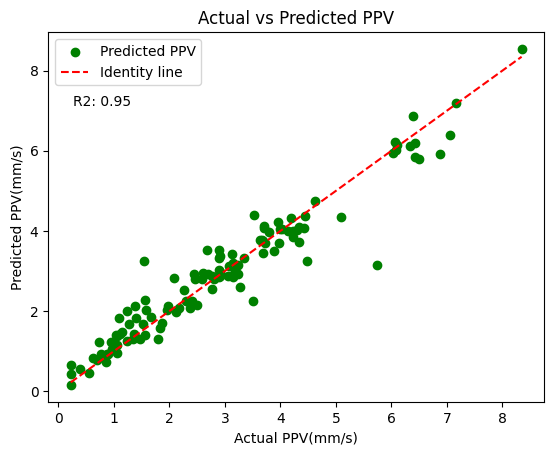

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on training data
y_pred_train = model2.predict(X_train_scaled)

# Calculate metrics
mse_train = model2.evaluate(X_train_scaled, y_train, verbose=0)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared:", r2_train)

# Randomly sample 120 points from the dataset
np.random.seed(42)  # For reproducibility
indices = np.random.choice(len(y_train), size=120, replace=False)

# Get sampled data
y_train_sampled = y_train.iloc[indices].values
y_pred_train_sampled = y_pred_train[indices]

# Scatter plot of actual vs predicted PPV values
plt.scatter(y_train_sampled, y_pred_train_sampled, color='green', label='Predicted PPV')

# Plotting the identity line
plt.plot([min(y_train_sampled), max(y_train_sampled)], [min(y_train_sampled), max(y_train_sampled)], color='red', linestyle='--', label='Identity line')

# Labels and title
plt.xlabel("Actual PPV(mm/s)")
plt.ylabel("Predicted PPV(mm/s)")
plt.title("Actual vs Predicted PPV")

# MSE and R2 annotation
plt.text(0.05, 0.8, f"R2: {r2_train:.2f}", transform=plt.gca().transAxes)

# Show legend
plt.legend()

# Display the plot
plt.show()


####Affichage du nuage de points avec (y=x) dans Test-set avec les données Augmentées

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Mean Squared Error: 0.521065354347229
Mean Absolute Error: 0.3135154510609571
R-squared: 0.9334420763087984


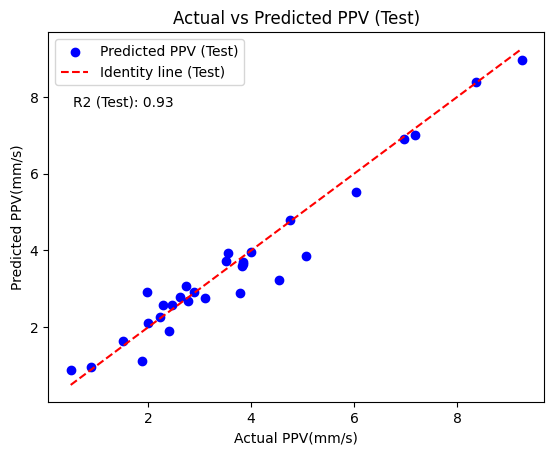

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Predict on test data
y_pred_test = model2.predict(X_test_scaled)

# Calculate metrics
mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = model2.evaluate(X_test_scaled, y_test, verbose=0)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared:", r2_test)

# Randomly sample 30 points from the test dataset
np.random.seed(42)  # For reproducibility
indices = np.random.choice(len(y_test), size=30, replace=False)

# Get sampled data
y_test_sampled = y_test.iloc[indices].values
y_pred_test_sampled = y_pred_test[indices]

# Scatter plot of actual vs predicted PPV values for the test set
plt.scatter(y_test_sampled, y_pred_test_sampled, color='blue', label='Predicted PPV (Test)')

# Plotting the identity line for the test set
plt.plot([min(y_test_sampled), max(y_test_sampled)], [min(y_test_sampled), max(y_test_sampled)], color='red', linestyle='--', label='Identity line (Test)')

# Labels and title
plt.xlabel("Actual PPV(mm/s)")
plt.ylabel("Predicted PPV(mm/s)")
plt.title("Actual vs Predicted PPV (Test)")

# R2 annotation
plt.text(0.05, 0.8, f"R2 (Test): {r2_test:.2f}", transform=plt.gca().transAxes)

# Show legend
plt.legend()

# Display the plot
plt.show()


####Faire des pédictions en utilisant de nouvelles données

In [ ]:

# Input new values
new_values = np.array([
    [225, 9, 4.92, 3.5, 50, 225, 600],
    [232, 7, 2.81, 2.2, 18, 232, 800],
    [177, 8, 4.3, 3.3, 32, 177, 700],
    [205, 8, 3.89, 3.2, 25, 205, 800],
    [188, 8, 3.55, 2.6, 32, 188, 800],
    [206, 11, 5.07, 4, 34, 206, 700],
    [235, 6, 8.24, 3.3, 50, 470, 700],
    [148, 6, 4, 3, 32, 148, 700]
])

# Scale the new values
new_values_scaled = scaler.transform(new_values)

# Predict using the trained model
new_predictions = model2.predict(new_values_scaled)

# Print the predictions
print("New Predictions:", new_predictions)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
New Predictions: [[5.2103477 ]
 [1.2885089 ]
 [5.3710513 ]
 [1.2261323 ]
 [1.1616259 ]
 [1.9949431 ]
 [0.68679994]
 [3.1669023 ]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


####Sauvegarde du modèle

In [ ]:
import joblib
# Save the Keras model to an .h5 file
model2.save('model_dataaug.h5')


In [ ]:
joblib.dump(scaler, 'scaler_dataaug.pkl')

####Extraction de nouvelles Dataframe afin de les utiliser dans le code R

In [ ]:
# Calcule de la 'SD' pour les donées d'entrainement
X_train['SD'] = X_train['Distance'] / np.sqrt(X_train['CUM'])
X_train

In [ ]:
# Sauvegarde du fichier csv
X_train.to_csv('Xaug_SD_train.csv', index=False)

In [ ]:
# Calcule de la 'SD' pour les donées de test
X_test['SD'] = X_test['Distance'] / np.sqrt(X_test['CUM'])
X_test

In [ ]:
# Sauvegarde du fichier csv
X_test.to_csv('Xaug_SD_test.csv', index=False)

In [ ]:
# Column names
columns = ['PPV train predicted']

# Convert numpy array to DataFrame
y_pred_train = pd.DataFrame(y_pred_train, columns=columns)

In [ ]:
# Column names
columns = ['PPV test predicted']

# Convert numpy array to DataFrame
y_pred_test = pd.DataFrame(y_pred_test, columns=columns)

In [ ]:
# Sauvegarde de deux fichiers csv pour les ajouter à 'Xaug_SD_train.csv' et 'Xaug_SD_test.csv' respectivement
y_pred_train.to_csv('yaug_pred_train.csv', index=False)
y_pred_test.to_csv('yaug_pred_test.csv', index=False)